In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import librosa.display
import librosa 
import os
import json
import matplotlib.pyplot as plt

In [17]:
def visualize(song_path):
    
    audio_file,sr = librosa.load(song_path)
    plt.figure(figsize = [20,7])
    librosa.display.waveplot(audio_file,alpha = 0.5)
    plt.xlabel("Time",fontsize = 15)
    plt.ylabel("Amplitude",fontsize = 15)
    file_name = song_path.split("\\")[-1]
    genre = file_name.split(".")[0]
    plt.title(genre,fontsize = 20)
    plt.show()

------------------------------                        Visualizing blues                        ------------------------------


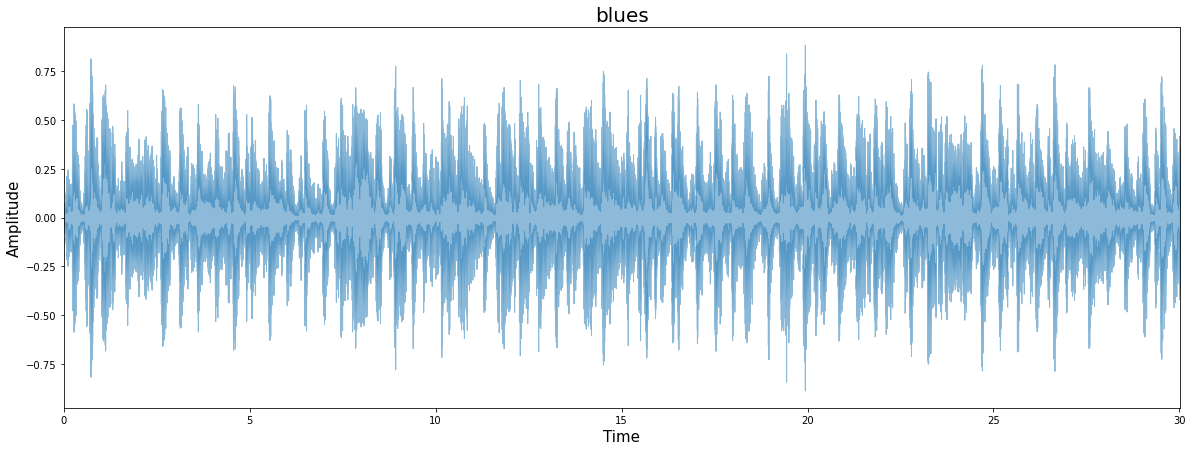

------------------------------                      Visualizing classical                      ------------------------------


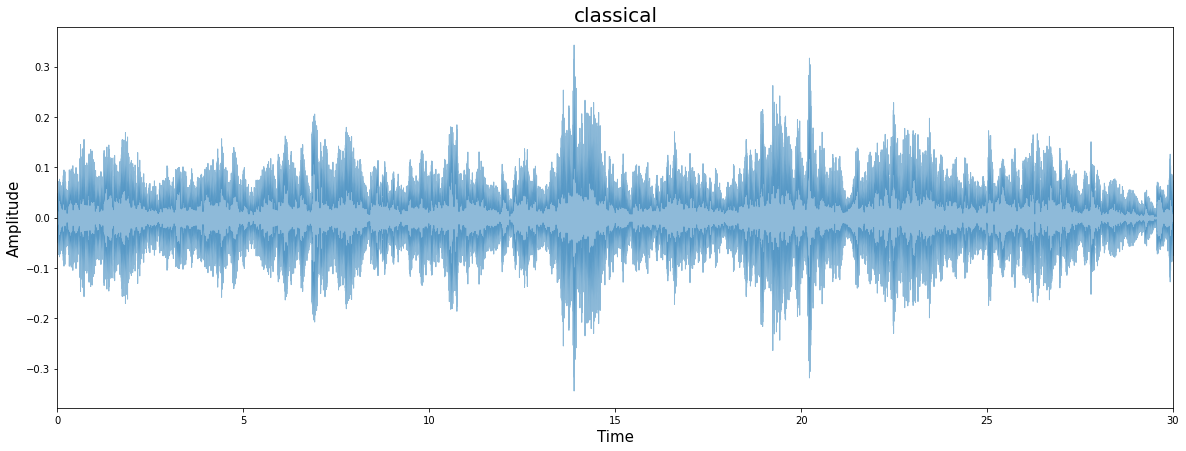

------------------------------                       Visualizing country                       ------------------------------


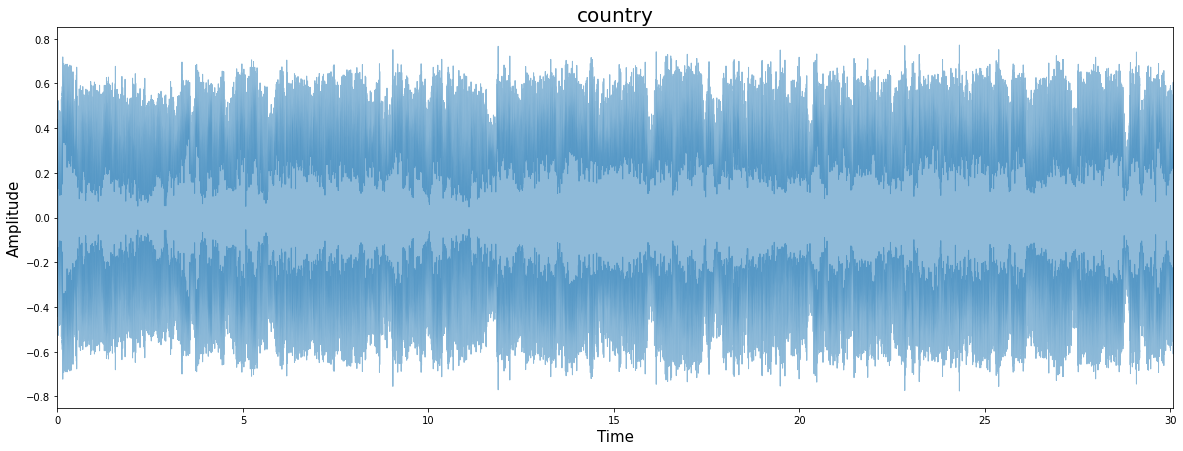

------------------------------                        Visualizing disco                        ------------------------------


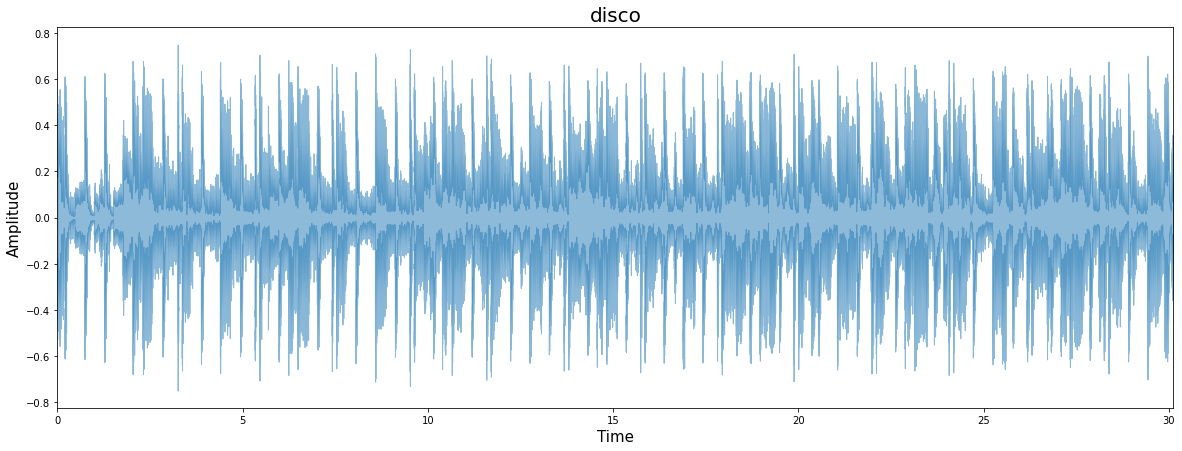

------------------------------                       Visualizing hiphop                        ------------------------------


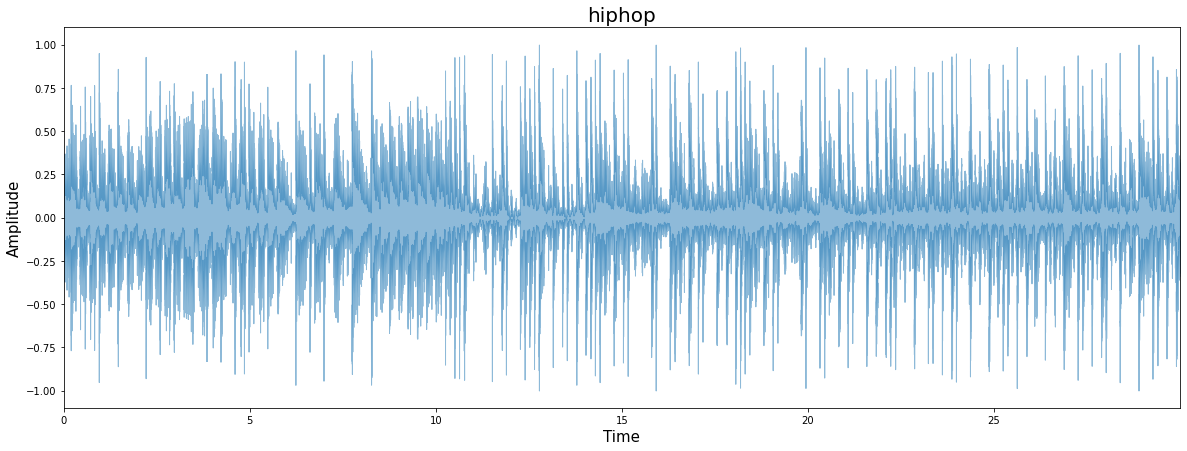

------------------------------                        Visualizing jazz                         ------------------------------


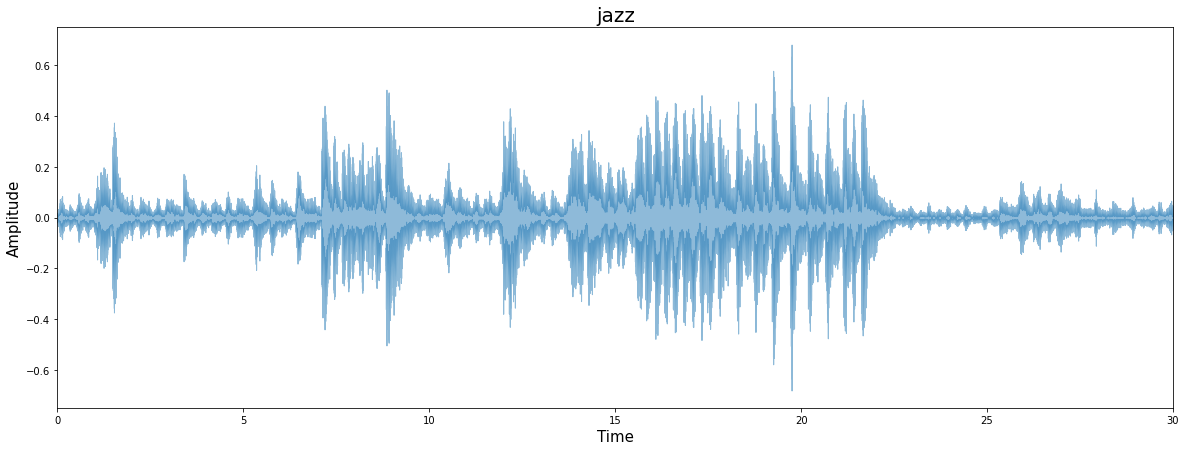

------------------------------                        Visualizing metal                        ------------------------------


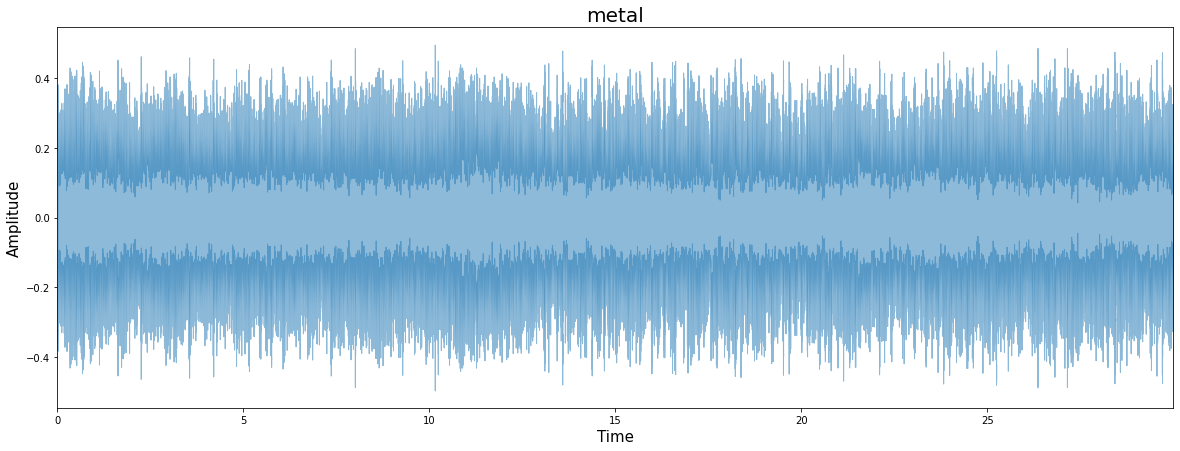

------------------------------                         Visualizing pop                         ------------------------------


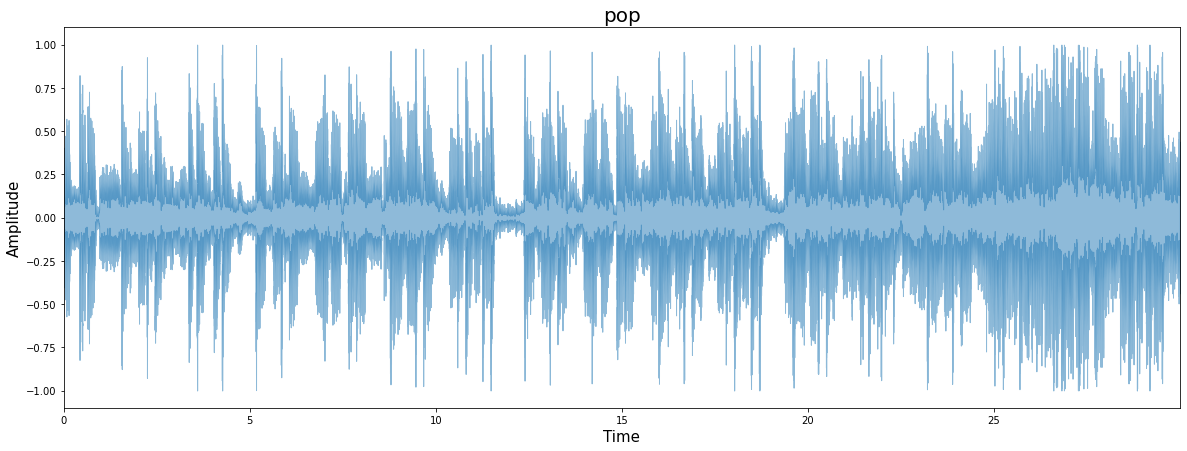

------------------------------                       Visualizing reggae                        ------------------------------


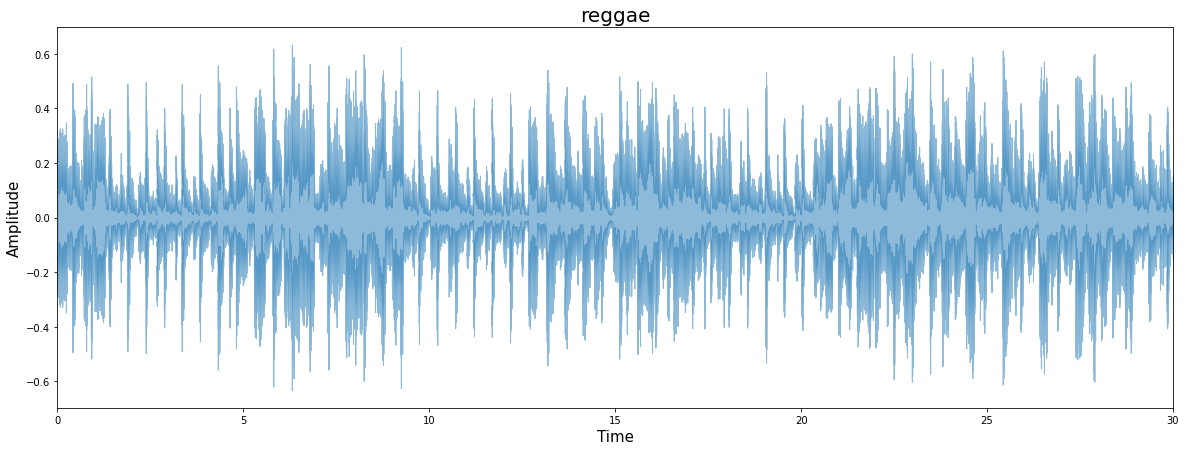

------------------------------                        Visualizing rock                         ------------------------------


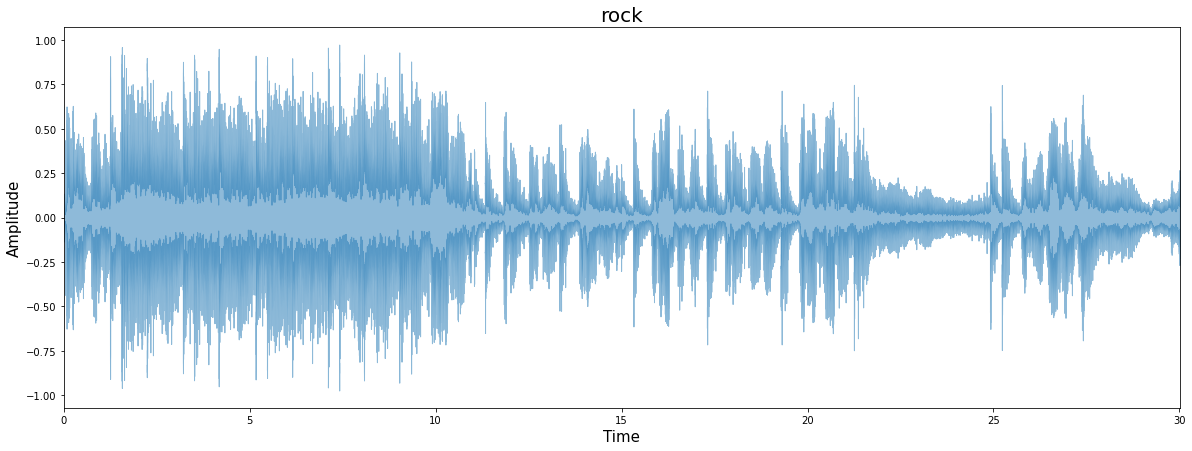

In [20]:
DIR_NAME = 'Audio Data/Data/genres_original'
genre_dirs = os.listdir(DIR_NAME)
for genre in genre_dirs:
    genre_dir = os.path.join(DIR_NAME,genre)
    song_name = os.listdir(genre_dir)[0]
    song_path = os.path.join(genre_dir,song_name)
    print('{}{:^65}{}'.format('-'*30,'Visualizing ' + genre,'-'*30))
    visualize(song_path)

In [7]:
DIR_NAME = 'Audio Data/Data/genres_original'
json_file = 'data.json'
SAMPLE_RATE = 22050
DURATION =30
SAMPLES_PER_TRACK = SAMPLE_RATE*DURATION

def save_mfccs(dataset_path,json_path,n_mfcc = 13,n_fft = 2048,hop_len = 512, num_segments = 5):
    
    data = {'mappings':[],
           'label':[],
           'mfccs':[]}
    
    num_samples_per_segment = int(SAMPLES_PER_TRACK/num_segments)
    expected_num_mfccs_vectors_per_segment = np.ceil(num_samples_per_segment/hop_len)
    
    
    for i,(dirpath,dirname,filenames) in enumerate(os.walk(dataset_path)):
        
        # 1st directory is the root directory itself
        if dirpath is not dataset_path:
            
            dirpath_components = dirpath.split("\\")
            semantic = dirpath_components[-1]
            # Adding the genres
            data['mappings'].append(semantic)
            print('\n Processing {}'.format(semantic))
            for file in filenames:
                
                file_path = os.path.join(dirpath,file)
                try:
                    audio_data,sr = librosa.load(file_path,sr=SAMPLE_RATE)
                except:
                    continue
                
                for s in range(num_segments):
                    
                    start_sample = num_samples_per_segment*s
                    finish_sample = start_sample + num_samples_per_segment
                    mfccs = librosa.feature.mfcc(audio_data[start_sample:finish_sample],
                                                 n_mfcc=n_mfcc,
                                                 n_fft=n_fft,
                                                 hop_length=hop_len,
                                                 sr=sr)
                    mfccs = mfccs.T  # We need Sequential Data 
                    if len(mfccs) == expected_num_mfccs_vectors_per_segment:
                        data['mfccs'].append(mfccs.tolist())
                        data['label'].append(i-1)
                        print('{} : segment {}'.format(file,s+1))

    with open(json_file,'w') as f:
        json.dump(data,f,indent=4)
    

In [8]:
save_mfccs(DIR_NAME,json_file,num_segments=10)


 Processing blues
blues.00000.wav : segment 1
blues.00000.wav : segment 2
blues.00000.wav : segment 3
blues.00000.wav : segment 4
blues.00000.wav : segment 5
blues.00000.wav : segment 6
blues.00000.wav : segment 7
blues.00000.wav : segment 8
blues.00000.wav : segment 9
blues.00000.wav : segment 10
blues.00001.wav : segment 1
blues.00001.wav : segment 2
blues.00001.wav : segment 3
blues.00001.wav : segment 4
blues.00001.wav : segment 5
blues.00001.wav : segment 6
blues.00001.wav : segment 7
blues.00001.wav : segment 8
blues.00001.wav : segment 9
blues.00001.wav : segment 10
blues.00002.wav : segment 1
blues.00002.wav : segment 2
blues.00002.wav : segment 3
blues.00002.wav : segment 4
blues.00002.wav : segment 5
blues.00002.wav : segment 6
blues.00002.wav : segment 7
blues.00002.wav : segment 8
blues.00002.wav : segment 9
blues.00002.wav : segment 10
blues.00003.wav : segment 1
blues.00003.wav : segment 2
blues.00003.wav : segment 3
blues.00003.wav : segment 4
blues.00003.wav : segment 

blues.00029.wav : segment 6
blues.00029.wav : segment 7
blues.00029.wav : segment 8
blues.00029.wav : segment 9
blues.00029.wav : segment 10
blues.00030.wav : segment 1
blues.00030.wav : segment 2
blues.00030.wav : segment 3
blues.00030.wav : segment 4
blues.00030.wav : segment 5
blues.00030.wav : segment 6
blues.00030.wav : segment 7
blues.00030.wav : segment 8
blues.00030.wav : segment 9
blues.00030.wav : segment 10
blues.00031.wav : segment 1
blues.00031.wav : segment 2
blues.00031.wav : segment 3
blues.00031.wav : segment 4
blues.00031.wav : segment 5
blues.00031.wav : segment 6
blues.00031.wav : segment 7
blues.00031.wav : segment 8
blues.00031.wav : segment 9
blues.00031.wav : segment 10
blues.00032.wav : segment 1
blues.00032.wav : segment 2
blues.00032.wav : segment 3
blues.00032.wav : segment 4
blues.00032.wav : segment 5
blues.00032.wav : segment 6
blues.00032.wav : segment 7
blues.00032.wav : segment 8
blues.00032.wav : segment 9
blues.00032.wav : segment 10
blues.00033.wav 

blues.00059.wav : segment 8
blues.00059.wav : segment 9
blues.00059.wav : segment 10
blues.00060.wav : segment 1
blues.00060.wav : segment 2
blues.00060.wav : segment 3
blues.00060.wav : segment 4
blues.00060.wav : segment 5
blues.00060.wav : segment 6
blues.00060.wav : segment 7
blues.00060.wav : segment 8
blues.00060.wav : segment 9
blues.00060.wav : segment 10
blues.00061.wav : segment 1
blues.00061.wav : segment 2
blues.00061.wav : segment 3
blues.00061.wav : segment 4
blues.00061.wav : segment 5
blues.00061.wav : segment 6
blues.00061.wav : segment 7
blues.00061.wav : segment 8
blues.00061.wav : segment 9
blues.00061.wav : segment 10
blues.00062.wav : segment 1
blues.00062.wav : segment 2
blues.00062.wav : segment 3
blues.00062.wav : segment 4
blues.00062.wav : segment 5
blues.00062.wav : segment 6
blues.00062.wav : segment 7
blues.00062.wav : segment 8
blues.00062.wav : segment 9
blues.00062.wav : segment 10
blues.00063.wav : segment 1
blues.00063.wav : segment 2
blues.00063.wav 

blues.00091.wav : segment 2
blues.00091.wav : segment 3
blues.00091.wav : segment 4
blues.00091.wav : segment 5
blues.00091.wav : segment 6
blues.00091.wav : segment 7
blues.00091.wav : segment 8
blues.00091.wav : segment 9
blues.00091.wav : segment 10
blues.00092.wav : segment 1
blues.00092.wav : segment 2
blues.00092.wav : segment 3
blues.00092.wav : segment 4
blues.00092.wav : segment 5
blues.00092.wav : segment 6
blues.00092.wav : segment 7
blues.00092.wav : segment 8
blues.00092.wav : segment 9
blues.00092.wav : segment 10
blues.00093.wav : segment 1
blues.00093.wav : segment 2
blues.00093.wav : segment 3
blues.00093.wav : segment 4
blues.00093.wav : segment 5
blues.00093.wav : segment 6
blues.00093.wav : segment 7
blues.00093.wav : segment 8
blues.00093.wav : segment 9
blues.00093.wav : segment 10
blues.00094.wav : segment 1
blues.00094.wav : segment 2
blues.00094.wav : segment 3
blues.00094.wav : segment 4
blues.00094.wav : segment 5
blues.00094.wav : segment 6
blues.00094.wav :

classical.00018.wav : segment 8
classical.00018.wav : segment 9
classical.00018.wav : segment 10
classical.00019.wav : segment 1
classical.00019.wav : segment 2
classical.00019.wav : segment 3
classical.00019.wav : segment 4
classical.00019.wav : segment 5
classical.00019.wav : segment 6
classical.00019.wav : segment 7
classical.00019.wav : segment 8
classical.00019.wav : segment 9
classical.00019.wav : segment 10
classical.00020.wav : segment 1
classical.00020.wav : segment 2
classical.00020.wav : segment 3
classical.00020.wav : segment 4
classical.00020.wav : segment 5
classical.00020.wav : segment 6
classical.00020.wav : segment 7
classical.00020.wav : segment 8
classical.00020.wav : segment 9
classical.00020.wav : segment 10
classical.00021.wav : segment 1
classical.00021.wav : segment 2
classical.00021.wav : segment 3
classical.00021.wav : segment 4
classical.00021.wav : segment 5
classical.00021.wav : segment 6
classical.00021.wav : segment 7
classical.00021.wav : segment 8
class

classical.00045.wav : segment 9
classical.00045.wav : segment 10
classical.00046.wav : segment 1
classical.00046.wav : segment 2
classical.00046.wav : segment 3
classical.00046.wav : segment 4
classical.00046.wav : segment 5
classical.00046.wav : segment 6
classical.00046.wav : segment 7
classical.00046.wav : segment 8
classical.00046.wav : segment 9
classical.00046.wav : segment 10
classical.00047.wav : segment 1
classical.00047.wav : segment 2
classical.00047.wav : segment 3
classical.00047.wav : segment 4
classical.00047.wav : segment 5
classical.00047.wav : segment 6
classical.00047.wav : segment 7
classical.00047.wav : segment 8
classical.00047.wav : segment 9
classical.00047.wav : segment 10
classical.00048.wav : segment 1
classical.00048.wav : segment 2
classical.00048.wav : segment 3
classical.00048.wav : segment 4
classical.00048.wav : segment 5
classical.00048.wav : segment 6
classical.00048.wav : segment 7
classical.00048.wav : segment 8
classical.00048.wav : segment 9
class

classical.00073.wav : segment 2
classical.00073.wav : segment 3
classical.00073.wav : segment 4
classical.00073.wav : segment 5
classical.00073.wav : segment 6
classical.00073.wav : segment 7
classical.00073.wav : segment 8
classical.00073.wav : segment 9
classical.00073.wav : segment 10
classical.00074.wav : segment 1
classical.00074.wav : segment 2
classical.00074.wav : segment 3
classical.00074.wav : segment 4
classical.00074.wav : segment 5
classical.00074.wav : segment 6
classical.00074.wav : segment 7
classical.00074.wav : segment 8
classical.00074.wav : segment 9
classical.00074.wav : segment 10
classical.00075.wav : segment 1
classical.00075.wav : segment 2
classical.00075.wav : segment 3
classical.00075.wav : segment 4
classical.00075.wav : segment 5
classical.00075.wav : segment 6
classical.00075.wav : segment 7
classical.00075.wav : segment 8
classical.00075.wav : segment 9
classical.00075.wav : segment 10
classical.00076.wav : segment 1
classical.00076.wav : segment 2
class

country.00000.wav : segment 5
country.00000.wav : segment 6
country.00000.wav : segment 7
country.00000.wav : segment 8
country.00000.wav : segment 9
country.00000.wav : segment 10
country.00001.wav : segment 1
country.00001.wav : segment 2
country.00001.wav : segment 3
country.00001.wav : segment 4
country.00001.wav : segment 5
country.00001.wav : segment 6
country.00001.wav : segment 7
country.00001.wav : segment 8
country.00001.wav : segment 9
country.00001.wav : segment 10
country.00002.wav : segment 1
country.00002.wav : segment 2
country.00002.wav : segment 3
country.00002.wav : segment 4
country.00002.wav : segment 5
country.00002.wav : segment 6
country.00002.wav : segment 7
country.00002.wav : segment 8
country.00002.wav : segment 9
country.00002.wav : segment 10
country.00003.wav : segment 1
country.00003.wav : segment 2
country.00003.wav : segment 3
country.00003.wav : segment 4
country.00003.wav : segment 5
country.00003.wav : segment 6
country.00003.wav : segment 7
country

country.00029.wav : segment 10
country.00030.wav : segment 1
country.00030.wav : segment 2
country.00030.wav : segment 3
country.00030.wav : segment 4
country.00030.wav : segment 5
country.00030.wav : segment 6
country.00030.wav : segment 7
country.00030.wav : segment 8
country.00030.wav : segment 9
country.00030.wav : segment 10
country.00031.wav : segment 1
country.00031.wav : segment 2
country.00031.wav : segment 3
country.00031.wav : segment 4
country.00031.wav : segment 5
country.00031.wav : segment 6
country.00031.wav : segment 7
country.00031.wav : segment 8
country.00031.wav : segment 9
country.00031.wav : segment 10
country.00032.wav : segment 1
country.00032.wav : segment 2
country.00032.wav : segment 3
country.00032.wav : segment 4
country.00032.wav : segment 5
country.00032.wav : segment 6
country.00032.wav : segment 7
country.00032.wav : segment 8
country.00032.wav : segment 9
country.00032.wav : segment 10
country.00033.wav : segment 1
country.00033.wav : segment 2
countr

country.00059.wav : segment 4
country.00059.wav : segment 5
country.00059.wav : segment 6
country.00059.wav : segment 7
country.00059.wav : segment 8
country.00059.wav : segment 9
country.00059.wav : segment 10
country.00060.wav : segment 1
country.00060.wav : segment 2
country.00060.wav : segment 3
country.00060.wav : segment 4
country.00060.wav : segment 5
country.00060.wav : segment 6
country.00060.wav : segment 7
country.00060.wav : segment 8
country.00060.wav : segment 9
country.00060.wav : segment 10
country.00061.wav : segment 1
country.00061.wav : segment 2
country.00061.wav : segment 3
country.00061.wav : segment 4
country.00061.wav : segment 5
country.00061.wav : segment 6
country.00061.wav : segment 7
country.00061.wav : segment 8
country.00061.wav : segment 9
country.00061.wav : segment 10
country.00062.wav : segment 1
country.00062.wav : segment 2
country.00062.wav : segment 3
country.00062.wav : segment 4
country.00062.wav : segment 5
country.00062.wav : segment 6
country

country.00086.wav : segment 7
country.00086.wav : segment 8
country.00086.wav : segment 9
country.00086.wav : segment 10
country.00087.wav : segment 1
country.00087.wav : segment 2
country.00087.wav : segment 3
country.00087.wav : segment 4
country.00087.wav : segment 5
country.00087.wav : segment 6
country.00087.wav : segment 7
country.00087.wav : segment 8
country.00087.wav : segment 9
country.00087.wav : segment 10
country.00088.wav : segment 1
country.00088.wav : segment 2
country.00088.wav : segment 3
country.00088.wav : segment 4
country.00088.wav : segment 5
country.00088.wav : segment 6
country.00088.wav : segment 7
country.00088.wav : segment 8
country.00088.wav : segment 9
country.00088.wav : segment 10
country.00089.wav : segment 1
country.00089.wav : segment 2
country.00089.wav : segment 3
country.00089.wav : segment 4
country.00089.wav : segment 5
country.00089.wav : segment 6
country.00089.wav : segment 7
country.00089.wav : segment 8
country.00089.wav : segment 9
country

disco.00015.wav : segment 2
disco.00015.wav : segment 3
disco.00015.wav : segment 4
disco.00015.wav : segment 5
disco.00015.wav : segment 6
disco.00015.wav : segment 7
disco.00015.wav : segment 8
disco.00015.wav : segment 9
disco.00015.wav : segment 10
disco.00016.wav : segment 1
disco.00016.wav : segment 2
disco.00016.wav : segment 3
disco.00016.wav : segment 4
disco.00016.wav : segment 5
disco.00016.wav : segment 6
disco.00016.wav : segment 7
disco.00016.wav : segment 8
disco.00016.wav : segment 9
disco.00016.wav : segment 10
disco.00017.wav : segment 1
disco.00017.wav : segment 2
disco.00017.wav : segment 3
disco.00017.wav : segment 4
disco.00017.wav : segment 5
disco.00017.wav : segment 6
disco.00017.wav : segment 7
disco.00017.wav : segment 8
disco.00017.wav : segment 9
disco.00017.wav : segment 10
disco.00018.wav : segment 1
disco.00018.wav : segment 2
disco.00018.wav : segment 3
disco.00018.wav : segment 4
disco.00018.wav : segment 5
disco.00018.wav : segment 6
disco.00018.wav :

disco.00046.wav : segment 4
disco.00046.wav : segment 5
disco.00046.wav : segment 6
disco.00046.wav : segment 7
disco.00046.wav : segment 8
disco.00046.wav : segment 9
disco.00046.wav : segment 10
disco.00047.wav : segment 1
disco.00047.wav : segment 2
disco.00047.wav : segment 3
disco.00047.wav : segment 4
disco.00047.wav : segment 5
disco.00047.wav : segment 6
disco.00047.wav : segment 7
disco.00047.wav : segment 8
disco.00047.wav : segment 9
disco.00047.wav : segment 10
disco.00048.wav : segment 1
disco.00048.wav : segment 2
disco.00048.wav : segment 3
disco.00048.wav : segment 4
disco.00048.wav : segment 5
disco.00048.wav : segment 6
disco.00048.wav : segment 7
disco.00048.wav : segment 8
disco.00048.wav : segment 9
disco.00048.wav : segment 10
disco.00049.wav : segment 1
disco.00049.wav : segment 2
disco.00049.wav : segment 3
disco.00049.wav : segment 4
disco.00049.wav : segment 5
disco.00049.wav : segment 6
disco.00049.wav : segment 7
disco.00049.wav : segment 8
disco.00049.wav :

disco.00075.wav : segment 8
disco.00075.wav : segment 9
disco.00075.wav : segment 10
disco.00076.wav : segment 1
disco.00076.wav : segment 2
disco.00076.wav : segment 3
disco.00076.wav : segment 4
disco.00076.wav : segment 5
disco.00076.wav : segment 6
disco.00076.wav : segment 7
disco.00076.wav : segment 8
disco.00076.wav : segment 9
disco.00076.wav : segment 10
disco.00077.wav : segment 1
disco.00077.wav : segment 2
disco.00077.wav : segment 3
disco.00077.wav : segment 4
disco.00077.wav : segment 5
disco.00077.wav : segment 6
disco.00077.wav : segment 7
disco.00077.wav : segment 8
disco.00077.wav : segment 9
disco.00077.wav : segment 10
disco.00078.wav : segment 1
disco.00078.wav : segment 2
disco.00078.wav : segment 3
disco.00078.wav : segment 4
disco.00078.wav : segment 5
disco.00078.wav : segment 6
disco.00078.wav : segment 7
disco.00078.wav : segment 8
disco.00078.wav : segment 9
disco.00078.wav : segment 10
disco.00079.wav : segment 1
disco.00079.wav : segment 2
disco.00079.wav 

hiphop.00005.wav : segment 9
hiphop.00005.wav : segment 10
hiphop.00006.wav : segment 1
hiphop.00006.wav : segment 2
hiphop.00006.wav : segment 3
hiphop.00006.wav : segment 4
hiphop.00006.wav : segment 5
hiphop.00006.wav : segment 6
hiphop.00006.wav : segment 7
hiphop.00006.wav : segment 8
hiphop.00006.wav : segment 9
hiphop.00006.wav : segment 10
hiphop.00007.wav : segment 1
hiphop.00007.wav : segment 2
hiphop.00007.wav : segment 3
hiphop.00007.wav : segment 4
hiphop.00007.wav : segment 5
hiphop.00007.wav : segment 6
hiphop.00007.wav : segment 7
hiphop.00007.wav : segment 8
hiphop.00007.wav : segment 9
hiphop.00007.wav : segment 10
hiphop.00008.wav : segment 1
hiphop.00008.wav : segment 2
hiphop.00008.wav : segment 3
hiphop.00008.wav : segment 4
hiphop.00008.wav : segment 5
hiphop.00008.wav : segment 6
hiphop.00008.wav : segment 7
hiphop.00008.wav : segment 8
hiphop.00008.wav : segment 9
hiphop.00008.wav : segment 10
hiphop.00009.wav : segment 1
hiphop.00009.wav : segment 2
hiphop.000

hiphop.00035.wav : segment 2
hiphop.00035.wav : segment 3
hiphop.00035.wav : segment 4
hiphop.00035.wav : segment 5
hiphop.00035.wav : segment 6
hiphop.00035.wav : segment 7
hiphop.00035.wav : segment 8
hiphop.00035.wav : segment 9
hiphop.00035.wav : segment 10
hiphop.00036.wav : segment 1
hiphop.00036.wav : segment 2
hiphop.00036.wav : segment 3
hiphop.00036.wav : segment 4
hiphop.00036.wav : segment 5
hiphop.00036.wav : segment 6
hiphop.00036.wav : segment 7
hiphop.00036.wav : segment 8
hiphop.00036.wav : segment 9
hiphop.00036.wav : segment 10
hiphop.00037.wav : segment 1
hiphop.00037.wav : segment 2
hiphop.00037.wav : segment 3
hiphop.00037.wav : segment 4
hiphop.00037.wav : segment 5
hiphop.00037.wav : segment 6
hiphop.00037.wav : segment 7
hiphop.00037.wav : segment 8
hiphop.00037.wav : segment 9
hiphop.00037.wav : segment 10
hiphop.00038.wav : segment 1
hiphop.00038.wav : segment 2
hiphop.00038.wav : segment 3
hiphop.00038.wav : segment 4
hiphop.00038.wav : segment 5
hiphop.0003

hiphop.00064.wav : segment 3
hiphop.00064.wav : segment 4
hiphop.00064.wav : segment 5
hiphop.00064.wav : segment 6
hiphop.00064.wav : segment 7
hiphop.00064.wav : segment 8
hiphop.00064.wav : segment 9
hiphop.00064.wav : segment 10
hiphop.00065.wav : segment 1
hiphop.00065.wav : segment 2
hiphop.00065.wav : segment 3
hiphop.00065.wav : segment 4
hiphop.00065.wav : segment 5
hiphop.00065.wav : segment 6
hiphop.00065.wav : segment 7
hiphop.00065.wav : segment 8
hiphop.00065.wav : segment 9
hiphop.00065.wav : segment 10
hiphop.00066.wav : segment 1
hiphop.00066.wav : segment 2
hiphop.00066.wav : segment 3
hiphop.00066.wav : segment 4
hiphop.00066.wav : segment 5
hiphop.00066.wav : segment 6
hiphop.00066.wav : segment 7
hiphop.00066.wav : segment 8
hiphop.00066.wav : segment 9
hiphop.00066.wav : segment 10
hiphop.00067.wav : segment 1
hiphop.00067.wav : segment 2
hiphop.00067.wav : segment 3
hiphop.00067.wav : segment 4
hiphop.00067.wav : segment 5
hiphop.00067.wav : segment 6
hiphop.0006

hiphop.00094.wav : segment 4
hiphop.00094.wav : segment 5
hiphop.00094.wav : segment 6
hiphop.00094.wav : segment 7
hiphop.00094.wav : segment 8
hiphop.00094.wav : segment 9
hiphop.00094.wav : segment 10
hiphop.00095.wav : segment 1
hiphop.00095.wav : segment 2
hiphop.00095.wav : segment 3
hiphop.00095.wav : segment 4
hiphop.00095.wav : segment 5
hiphop.00095.wav : segment 6
hiphop.00095.wav : segment 7
hiphop.00095.wav : segment 8
hiphop.00095.wav : segment 9
hiphop.00095.wav : segment 10
hiphop.00096.wav : segment 1
hiphop.00096.wav : segment 2
hiphop.00096.wav : segment 3
hiphop.00096.wav : segment 4
hiphop.00096.wav : segment 5
hiphop.00096.wav : segment 6
hiphop.00096.wav : segment 7
hiphop.00096.wav : segment 8
hiphop.00096.wav : segment 9
hiphop.00096.wav : segment 10
hiphop.00097.wav : segment 1
hiphop.00097.wav : segment 2
hiphop.00097.wav : segment 3
hiphop.00097.wav : segment 4
hiphop.00097.wav : segment 5
hiphop.00097.wav : segment 6
hiphop.00097.wav : segment 7
hiphop.0009

jazz.00024.wav : segment 2
jazz.00024.wav : segment 3
jazz.00024.wav : segment 4
jazz.00024.wav : segment 5
jazz.00024.wav : segment 6
jazz.00024.wav : segment 7
jazz.00024.wav : segment 8
jazz.00024.wav : segment 9
jazz.00024.wav : segment 10
jazz.00025.wav : segment 1
jazz.00025.wav : segment 2
jazz.00025.wav : segment 3
jazz.00025.wav : segment 4
jazz.00025.wav : segment 5
jazz.00025.wav : segment 6
jazz.00025.wav : segment 7
jazz.00025.wav : segment 8
jazz.00025.wav : segment 9
jazz.00025.wav : segment 10
jazz.00026.wav : segment 1
jazz.00026.wav : segment 2
jazz.00026.wav : segment 3
jazz.00026.wav : segment 4
jazz.00026.wav : segment 5
jazz.00026.wav : segment 6
jazz.00026.wav : segment 7
jazz.00026.wav : segment 8
jazz.00026.wav : segment 9
jazz.00026.wav : segment 10
jazz.00027.wav : segment 1
jazz.00027.wav : segment 2
jazz.00027.wav : segment 3
jazz.00027.wav : segment 4
jazz.00027.wav : segment 5
jazz.00027.wav : segment 6
jazz.00027.wav : segment 7
jazz.00027.wav : segment 

jazz.00057.wav : segment 7
jazz.00057.wav : segment 8
jazz.00057.wav : segment 9
jazz.00057.wav : segment 10
jazz.00058.wav : segment 1
jazz.00058.wav : segment 2
jazz.00058.wav : segment 3
jazz.00058.wav : segment 4
jazz.00058.wav : segment 5
jazz.00058.wav : segment 6
jazz.00058.wav : segment 7
jazz.00058.wav : segment 8
jazz.00058.wav : segment 9
jazz.00058.wav : segment 10
jazz.00059.wav : segment 1
jazz.00059.wav : segment 2
jazz.00059.wav : segment 3
jazz.00059.wav : segment 4
jazz.00059.wav : segment 5
jazz.00059.wav : segment 6
jazz.00059.wav : segment 7
jazz.00059.wav : segment 8
jazz.00059.wav : segment 9
jazz.00059.wav : segment 10
jazz.00060.wav : segment 1
jazz.00060.wav : segment 2
jazz.00060.wav : segment 3
jazz.00060.wav : segment 4
jazz.00060.wav : segment 5
jazz.00060.wav : segment 6
jazz.00060.wav : segment 7
jazz.00060.wav : segment 8
jazz.00060.wav : segment 9
jazz.00060.wav : segment 10
jazz.00061.wav : segment 1
jazz.00061.wav : segment 2
jazz.00061.wav : segment

jazz.00087.wav : segment 10
jazz.00088.wav : segment 1
jazz.00088.wav : segment 2
jazz.00088.wav : segment 3
jazz.00088.wav : segment 4
jazz.00088.wav : segment 5
jazz.00088.wav : segment 6
jazz.00088.wav : segment 7
jazz.00088.wav : segment 8
jazz.00088.wav : segment 9
jazz.00088.wav : segment 10
jazz.00089.wav : segment 1
jazz.00089.wav : segment 2
jazz.00089.wav : segment 3
jazz.00089.wav : segment 4
jazz.00089.wav : segment 5
jazz.00089.wav : segment 6
jazz.00089.wav : segment 7
jazz.00089.wav : segment 8
jazz.00089.wav : segment 9
jazz.00089.wav : segment 10
jazz.00090.wav : segment 1
jazz.00090.wav : segment 2
jazz.00090.wav : segment 3
jazz.00090.wav : segment 4
jazz.00090.wav : segment 5
jazz.00090.wav : segment 6
jazz.00090.wav : segment 7
jazz.00090.wav : segment 8
jazz.00090.wav : segment 9
jazz.00090.wav : segment 10
jazz.00091.wav : segment 1
jazz.00091.wav : segment 2
jazz.00091.wav : segment 3
jazz.00091.wav : segment 4
jazz.00091.wav : segment 5
jazz.00091.wav : segment

metal.00018.wav : segment 2
metal.00018.wav : segment 3
metal.00018.wav : segment 4
metal.00018.wav : segment 5
metal.00018.wav : segment 6
metal.00018.wav : segment 7
metal.00018.wav : segment 8
metal.00018.wav : segment 9
metal.00018.wav : segment 10
metal.00019.wav : segment 1
metal.00019.wav : segment 2
metal.00019.wav : segment 3
metal.00019.wav : segment 4
metal.00019.wav : segment 5
metal.00019.wav : segment 6
metal.00019.wav : segment 7
metal.00019.wav : segment 8
metal.00019.wav : segment 9
metal.00019.wav : segment 10
metal.00020.wav : segment 1
metal.00020.wav : segment 2
metal.00020.wav : segment 3
metal.00020.wav : segment 4
metal.00020.wav : segment 5
metal.00020.wav : segment 6
metal.00020.wav : segment 7
metal.00020.wav : segment 8
metal.00020.wav : segment 9
metal.00020.wav : segment 10
metal.00021.wav : segment 1
metal.00021.wav : segment 2
metal.00021.wav : segment 3
metal.00021.wav : segment 4
metal.00021.wav : segment 5
metal.00021.wav : segment 6
metal.00021.wav :

metal.00047.wav : segment 9
metal.00047.wav : segment 10
metal.00048.wav : segment 1
metal.00048.wav : segment 2
metal.00048.wav : segment 3
metal.00048.wav : segment 4
metal.00048.wav : segment 5
metal.00048.wav : segment 6
metal.00048.wav : segment 7
metal.00048.wav : segment 8
metal.00048.wav : segment 9
metal.00048.wav : segment 10
metal.00049.wav : segment 1
metal.00049.wav : segment 2
metal.00049.wav : segment 3
metal.00049.wav : segment 4
metal.00049.wav : segment 5
metal.00049.wav : segment 6
metal.00049.wav : segment 7
metal.00049.wav : segment 8
metal.00049.wav : segment 9
metal.00049.wav : segment 10
metal.00050.wav : segment 1
metal.00050.wav : segment 2
metal.00050.wav : segment 3
metal.00050.wav : segment 4
metal.00050.wav : segment 5
metal.00050.wav : segment 6
metal.00050.wav : segment 7
metal.00050.wav : segment 8
metal.00050.wav : segment 9
metal.00050.wav : segment 10
metal.00051.wav : segment 1
metal.00051.wav : segment 2
metal.00051.wav : segment 3
metal.00051.wav 

metal.00078.wav : segment 4
metal.00078.wav : segment 5
metal.00078.wav : segment 6
metal.00078.wav : segment 7
metal.00078.wav : segment 8
metal.00078.wav : segment 9
metal.00078.wav : segment 10
metal.00079.wav : segment 1
metal.00079.wav : segment 2
metal.00079.wav : segment 3
metal.00079.wav : segment 4
metal.00079.wav : segment 5
metal.00079.wav : segment 6
metal.00079.wav : segment 7
metal.00079.wav : segment 8
metal.00079.wav : segment 9
metal.00079.wav : segment 10
metal.00080.wav : segment 1
metal.00080.wav : segment 2
metal.00080.wav : segment 3
metal.00080.wav : segment 4
metal.00080.wav : segment 5
metal.00080.wav : segment 6
metal.00080.wav : segment 7
metal.00080.wav : segment 8
metal.00080.wav : segment 9
metal.00080.wav : segment 10
metal.00081.wav : segment 1
metal.00081.wav : segment 2
metal.00081.wav : segment 3
metal.00081.wav : segment 4
metal.00081.wav : segment 5
metal.00081.wav : segment 6
metal.00081.wav : segment 7
metal.00081.wav : segment 8
metal.00081.wav :

pop.00009.wav : segment 6
pop.00009.wav : segment 7
pop.00009.wav : segment 8
pop.00009.wav : segment 9
pop.00009.wav : segment 10
pop.00010.wav : segment 1
pop.00010.wav : segment 2
pop.00010.wav : segment 3
pop.00010.wav : segment 4
pop.00010.wav : segment 5
pop.00010.wav : segment 6
pop.00010.wav : segment 7
pop.00010.wav : segment 8
pop.00010.wav : segment 9
pop.00010.wav : segment 10
pop.00011.wav : segment 1
pop.00011.wav : segment 2
pop.00011.wav : segment 3
pop.00011.wav : segment 4
pop.00011.wav : segment 5
pop.00011.wav : segment 6
pop.00011.wav : segment 7
pop.00011.wav : segment 8
pop.00011.wav : segment 9
pop.00011.wav : segment 10
pop.00012.wav : segment 1
pop.00012.wav : segment 2
pop.00012.wav : segment 3
pop.00012.wav : segment 4
pop.00012.wav : segment 5
pop.00012.wav : segment 6
pop.00012.wav : segment 7
pop.00012.wav : segment 8
pop.00012.wav : segment 9
pop.00012.wav : segment 10
pop.00013.wav : segment 1
pop.00013.wav : segment 2
pop.00013.wav : segment 3
pop.0001

pop.00041.wav : segment 10
pop.00042.wav : segment 1
pop.00042.wav : segment 2
pop.00042.wav : segment 3
pop.00042.wav : segment 4
pop.00042.wav : segment 5
pop.00042.wav : segment 6
pop.00042.wav : segment 7
pop.00042.wav : segment 8
pop.00042.wav : segment 9
pop.00042.wav : segment 10
pop.00043.wav : segment 1
pop.00043.wav : segment 2
pop.00043.wav : segment 3
pop.00043.wav : segment 4
pop.00043.wav : segment 5
pop.00043.wav : segment 6
pop.00043.wav : segment 7
pop.00043.wav : segment 8
pop.00043.wav : segment 9
pop.00043.wav : segment 10
pop.00044.wav : segment 1
pop.00044.wav : segment 2
pop.00044.wav : segment 3
pop.00044.wav : segment 4
pop.00044.wav : segment 5
pop.00044.wav : segment 6
pop.00044.wav : segment 7
pop.00044.wav : segment 8
pop.00044.wav : segment 9
pop.00044.wav : segment 10
pop.00045.wav : segment 1
pop.00045.wav : segment 2
pop.00045.wav : segment 3
pop.00045.wav : segment 4
pop.00045.wav : segment 5
pop.00045.wav : segment 6
pop.00045.wav : segment 7
pop.0004

pop.00074.wav : segment 2
pop.00074.wav : segment 3
pop.00074.wav : segment 4
pop.00074.wav : segment 5
pop.00074.wav : segment 6
pop.00074.wav : segment 7
pop.00074.wav : segment 8
pop.00074.wav : segment 9
pop.00074.wav : segment 10
pop.00075.wav : segment 1
pop.00075.wav : segment 2
pop.00075.wav : segment 3
pop.00075.wav : segment 4
pop.00075.wav : segment 5
pop.00075.wav : segment 6
pop.00075.wav : segment 7
pop.00075.wav : segment 8
pop.00075.wav : segment 9
pop.00075.wav : segment 10
pop.00076.wav : segment 1
pop.00076.wav : segment 2
pop.00076.wav : segment 3
pop.00076.wav : segment 4
pop.00076.wav : segment 5
pop.00076.wav : segment 6
pop.00076.wav : segment 7
pop.00076.wav : segment 8
pop.00076.wav : segment 9
pop.00076.wav : segment 10
pop.00077.wav : segment 1
pop.00077.wav : segment 2
pop.00077.wav : segment 3
pop.00077.wav : segment 4
pop.00077.wav : segment 5
pop.00077.wav : segment 6
pop.00077.wav : segment 7
pop.00077.wav : segment 8
pop.00077.wav : segment 9
pop.00077

reggae.00005.wav : segment 8
reggae.00005.wav : segment 9
reggae.00005.wav : segment 10
reggae.00006.wav : segment 1
reggae.00006.wav : segment 2
reggae.00006.wav : segment 3
reggae.00006.wav : segment 4
reggae.00006.wav : segment 5
reggae.00006.wav : segment 6
reggae.00006.wav : segment 7
reggae.00006.wav : segment 8
reggae.00006.wav : segment 9
reggae.00006.wav : segment 10
reggae.00007.wav : segment 1
reggae.00007.wav : segment 2
reggae.00007.wav : segment 3
reggae.00007.wav : segment 4
reggae.00007.wav : segment 5
reggae.00007.wav : segment 6
reggae.00007.wav : segment 7
reggae.00007.wav : segment 8
reggae.00007.wav : segment 9
reggae.00007.wav : segment 10
reggae.00008.wav : segment 1
reggae.00008.wav : segment 2
reggae.00008.wav : segment 3
reggae.00008.wav : segment 4
reggae.00008.wav : segment 5
reggae.00008.wav : segment 6
reggae.00008.wav : segment 7
reggae.00008.wav : segment 8
reggae.00008.wav : segment 9
reggae.00008.wav : segment 10
reggae.00009.wav : segment 1
reggae.000

reggae.00036.wav : segment 3
reggae.00036.wav : segment 4
reggae.00036.wav : segment 5
reggae.00036.wav : segment 6
reggae.00036.wav : segment 7
reggae.00036.wav : segment 8
reggae.00036.wav : segment 9
reggae.00036.wav : segment 10
reggae.00037.wav : segment 1
reggae.00037.wav : segment 2
reggae.00037.wav : segment 3
reggae.00037.wav : segment 4
reggae.00037.wav : segment 5
reggae.00037.wav : segment 6
reggae.00037.wav : segment 7
reggae.00037.wav : segment 8
reggae.00037.wav : segment 9
reggae.00037.wav : segment 10
reggae.00038.wav : segment 1
reggae.00038.wav : segment 2
reggae.00038.wav : segment 3
reggae.00038.wav : segment 4
reggae.00038.wav : segment 5
reggae.00038.wav : segment 6
reggae.00038.wav : segment 7
reggae.00038.wav : segment 8
reggae.00038.wav : segment 9
reggae.00038.wav : segment 10
reggae.00039.wav : segment 1
reggae.00039.wav : segment 2
reggae.00039.wav : segment 3
reggae.00039.wav : segment 4
reggae.00039.wav : segment 5
reggae.00039.wav : segment 6
reggae.0003

reggae.00066.wav : segment 2
reggae.00066.wav : segment 3
reggae.00066.wav : segment 4
reggae.00066.wav : segment 5
reggae.00066.wav : segment 6
reggae.00066.wav : segment 7
reggae.00066.wav : segment 8
reggae.00066.wav : segment 9
reggae.00066.wav : segment 10
reggae.00067.wav : segment 1
reggae.00067.wav : segment 2
reggae.00067.wav : segment 3
reggae.00067.wav : segment 4
reggae.00067.wav : segment 5
reggae.00067.wav : segment 6
reggae.00067.wav : segment 7
reggae.00067.wav : segment 8
reggae.00067.wav : segment 9
reggae.00067.wav : segment 10
reggae.00068.wav : segment 1
reggae.00068.wav : segment 2
reggae.00068.wav : segment 3
reggae.00068.wav : segment 4
reggae.00068.wav : segment 5
reggae.00068.wav : segment 6
reggae.00068.wav : segment 7
reggae.00068.wav : segment 8
reggae.00068.wav : segment 9
reggae.00068.wav : segment 10
reggae.00069.wav : segment 1
reggae.00069.wav : segment 2
reggae.00069.wav : segment 3
reggae.00069.wav : segment 4
reggae.00069.wav : segment 5
reggae.0006

reggae.00096.wav : segment 7
reggae.00096.wav : segment 8
reggae.00096.wav : segment 9
reggae.00096.wav : segment 10
reggae.00097.wav : segment 1
reggae.00097.wav : segment 2
reggae.00097.wav : segment 3
reggae.00097.wav : segment 4
reggae.00097.wav : segment 5
reggae.00097.wav : segment 6
reggae.00097.wav : segment 7
reggae.00097.wav : segment 8
reggae.00097.wav : segment 9
reggae.00097.wav : segment 10
reggae.00098.wav : segment 1
reggae.00098.wav : segment 2
reggae.00098.wav : segment 3
reggae.00098.wav : segment 4
reggae.00098.wav : segment 5
reggae.00098.wav : segment 6
reggae.00098.wav : segment 7
reggae.00098.wav : segment 8
reggae.00098.wav : segment 9
reggae.00098.wav : segment 10
reggae.00099.wav : segment 1
reggae.00099.wav : segment 2
reggae.00099.wav : segment 3
reggae.00099.wav : segment 4
reggae.00099.wav : segment 5
reggae.00099.wav : segment 6
reggae.00099.wav : segment 7
reggae.00099.wav : segment 8
reggae.00099.wav : segment 9
reggae.00099.wav : segment 10

 Processi

rock.00026.wav : segment 8
rock.00026.wav : segment 9
rock.00026.wav : segment 10
rock.00027.wav : segment 1
rock.00027.wav : segment 2
rock.00027.wav : segment 3
rock.00027.wav : segment 4
rock.00027.wav : segment 5
rock.00027.wav : segment 6
rock.00027.wav : segment 7
rock.00027.wav : segment 8
rock.00027.wav : segment 9
rock.00027.wav : segment 10
rock.00028.wav : segment 1
rock.00028.wav : segment 2
rock.00028.wav : segment 3
rock.00028.wav : segment 4
rock.00028.wav : segment 5
rock.00028.wav : segment 6
rock.00028.wav : segment 7
rock.00028.wav : segment 8
rock.00028.wav : segment 9
rock.00028.wav : segment 10
rock.00029.wav : segment 1
rock.00029.wav : segment 2
rock.00029.wav : segment 3
rock.00029.wav : segment 4
rock.00029.wav : segment 5
rock.00029.wav : segment 6
rock.00029.wav : segment 7
rock.00029.wav : segment 8
rock.00029.wav : segment 9
rock.00029.wav : segment 10
rock.00030.wav : segment 1
rock.00030.wav : segment 2
rock.00030.wav : segment 3
rock.00030.wav : segment

rock.00059.wav : segment 2
rock.00059.wav : segment 3
rock.00059.wav : segment 4
rock.00059.wav : segment 5
rock.00059.wav : segment 6
rock.00059.wav : segment 7
rock.00059.wav : segment 8
rock.00059.wav : segment 9
rock.00059.wav : segment 10
rock.00060.wav : segment 1
rock.00060.wav : segment 2
rock.00060.wav : segment 3
rock.00060.wav : segment 4
rock.00060.wav : segment 5
rock.00060.wav : segment 6
rock.00060.wav : segment 7
rock.00060.wav : segment 8
rock.00060.wav : segment 9
rock.00060.wav : segment 10
rock.00061.wav : segment 1
rock.00061.wav : segment 2
rock.00061.wav : segment 3
rock.00061.wav : segment 4
rock.00061.wav : segment 5
rock.00061.wav : segment 6
rock.00061.wav : segment 7
rock.00061.wav : segment 8
rock.00061.wav : segment 9
rock.00061.wav : segment 10
rock.00062.wav : segment 1
rock.00062.wav : segment 2
rock.00062.wav : segment 3
rock.00062.wav : segment 4
rock.00062.wav : segment 5
rock.00062.wav : segment 6
rock.00062.wav : segment 7
rock.00062.wav : segment 

rock.00091.wav : segment 9
rock.00091.wav : segment 10
rock.00092.wav : segment 1
rock.00092.wav : segment 2
rock.00092.wav : segment 3
rock.00092.wav : segment 4
rock.00092.wav : segment 5
rock.00092.wav : segment 6
rock.00092.wav : segment 7
rock.00092.wav : segment 8
rock.00092.wav : segment 9
rock.00092.wav : segment 10
rock.00093.wav : segment 1
rock.00093.wav : segment 2
rock.00093.wav : segment 3
rock.00093.wav : segment 4
rock.00093.wav : segment 5
rock.00093.wav : segment 6
rock.00093.wav : segment 7
rock.00093.wav : segment 8
rock.00093.wav : segment 9
rock.00093.wav : segment 10
rock.00094.wav : segment 1
rock.00094.wav : segment 2
rock.00094.wav : segment 3
rock.00094.wav : segment 4
rock.00094.wav : segment 5
rock.00094.wav : segment 6
rock.00094.wav : segment 7
rock.00094.wav : segment 8
rock.00094.wav : segment 9
rock.00094.wav : segment 10
rock.00095.wav : segment 1
rock.00095.wav : segment 2
rock.00095.wav : segment 3
rock.00095.wav : segment 4
rock.00095.wav : segment